In [2]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import the dataset
marketing = pd.read_csv('dataset/marketing.csv')

In [4]:
# The normal parse_dates parameter does not work for this dataset
# Instead, we will use the following code to convert the date columns to datetime
date_time = ['date_served', 'date_subscribed', 'date_canceled']
for i in date_time:
    marketing[i] = pd.to_datetime(marketing[i])

print(marketing['date_served'].dtype)

datetime64[ns]


## Examining the data

In [5]:
# Print the first five rows of the DataFrame
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [6]:
# Print the statistics of all columns
marketing.describe()

C:\Users\Shannon\AppData\Local\Temp\ipykernel_23076\4247376042.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  marketing.describe()
C:\Users\Shannon\AppData\Local\Temp\ipykernel_23076\4247376042.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  marketing.describe()
C:\Users\Shannon\AppData\Local\Temp\ipykernel_23076\4247376042.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mark

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,2018-01-15 00:00:00,House Ads,control,False,English,English,19-24 years,2018-01-16 00:00:00,2018-04-02 00:00:00,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-05 00:00:00,NaN,NaN
last,NaN,2018-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 00:00:00,2018-05-09 00:00:00,NaN,NaN


In [7]:
# Check column data types and non-missing values
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


## Updating the data type of a column

In [8]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

object


In [9]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')
# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

bool


By changing the data type to boolean, you can now sum the is_retained column to calculate the number of users who were retained.

## Adding new columns

In [10]:
# Mapping for channels
channel_dict = {'House Ads': 1, 'Instagram': 2, 'Facebook': 3, 'Email': 4, 'Push': 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [11]:
# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_displayed'] == marketing['language_preferred'],
    "Yes", "No"
    )

In [12]:
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

## Daily marketing reach by channel

In [13]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()
daily_users.head()

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64

## Visualizing daily marketing reach

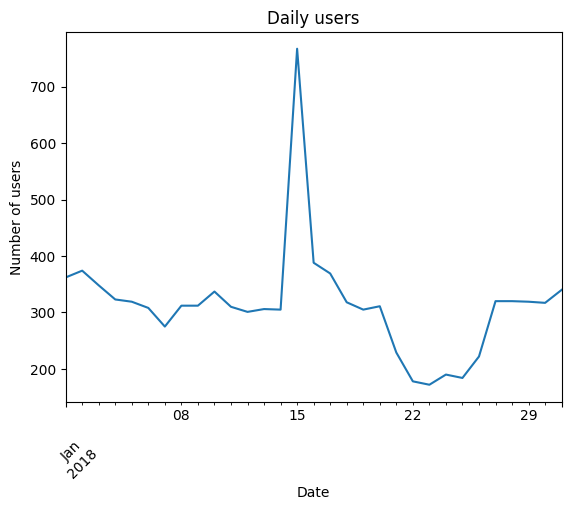

In [14]:
# Plot daily_subscribers
daily_users.plot()

plt.title('Daily users')
plt.xlabel('Date')
plt.ylabel('Number of users')

plt.xticks(rotation=45)

plt.show()

Much like in daily users who view marketing assets, there's a large peak around the time when an email blast goes out.

## Calculating conversion rate

In [15]:
# Calculate the number of people marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted']==True]['user_id'].nunique()

# Conversion rate
conversion_rate = subscribers/total

print(round(conversion_rate*100, 2),'%')

13.89 %


## Calculating Retention Rate

In [16]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing['converted']==True]['user_id'].nunique()

# Calculate the number of people who remainded subscribed
retained = marketing[(marketing['is_retained']==True)&(marketing['converted']==True)]['user_id'].nunique()

# Calulate the retention rate
retention_rate = retained/total_subscribers

print(round(retention_rate*100, 2), '%')

67.09 %


In [17]:
marketing['user_id'].nunique()

7309

## Comparing language conversion rate 

In [18]:
# Isolate English Speakers
english_speakers = marketing[marketing['language_preferred']=='English']

# Total number of English Speakers
total = english_speakers['user_id'].nunique()

# Number of english speakers who converted
subscribers = english_speakers[english_speakers['converted']==True]['user_id'].nunique()

# Conversion rate
conversion_rate = subscribers/total

print('English Speaker Conversion Rate:',round(conversion_rate*100, 2),'%')

English Speaker Conversion Rate: 13.25 %


In [19]:
# Group by language displayer and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

#Group by language displayed and count unique converison
subscribers = marketing[marketing['converted']==True].groupby(['language_displayed'])['user_id'].nunique()

#Conversion rate
language_conversion_rate = subscribers/total
language_conversion_rate*100

language_displayed
Arabic     50.000000
English    12.916725
German     71.621622
Spanish    20.000000
Name: user_id, dtype: float64

You'll notice the conversion rate is much lower for English and Spanish.

## Aggregating by date

In [20]:
# Group by date_served and coutn unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date served and count unique converted users
subscribers = marketing[marketing['converted']==True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate
daily_conversion_rates = subscribers/total
daily_conversion_rates = daily_conversion_rates*100

# Calculate the average conversion rate
avg_conversion_rate = sum(daily_conversion_rates)/len(daily_conversion_rates)
avg_conversion_rate

10.496742176615497

<Axes: xlabel='date_served'>

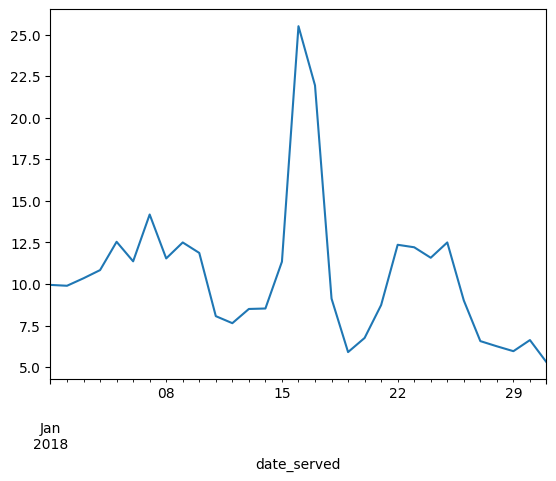

In [21]:
daily_conversion_rates.plot()

## Visualize conversion rate by language

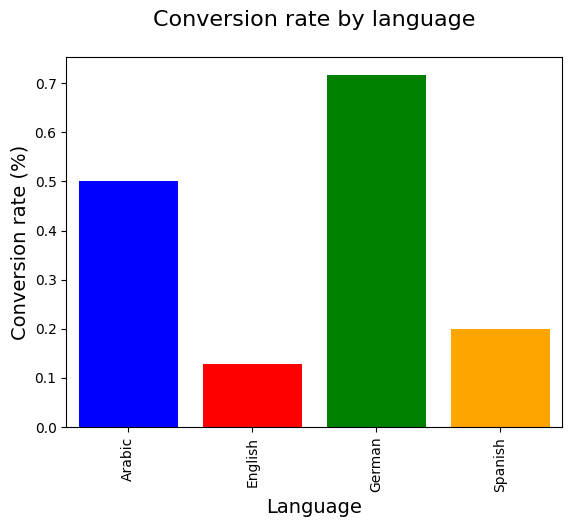

In [48]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = 'bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

# Add color to the bars
plt.bar(language_conversion_rate.index, language_conversion_rate, color = ['blue', 'red', 'green', 'orange'])

# Display the plot
plt.show()

This plot shows that German and Arabic speakers have much higher conversion rates than English and Spanish speakers.

## Setting up our data to visualize daily conversion

In [23]:
# Reset index to turn results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())

# Rename columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']

## Visualize daily conversion rate

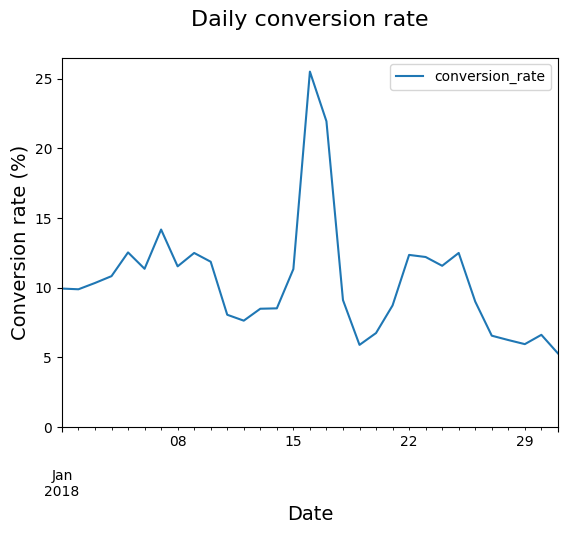

In [24]:
# Create a line chart using daily_conversion_rate
daily_conversion_rate.plot('date_served', 'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

The conversion rate is relatively steady except for one day in January

## Marketing channels across age groups

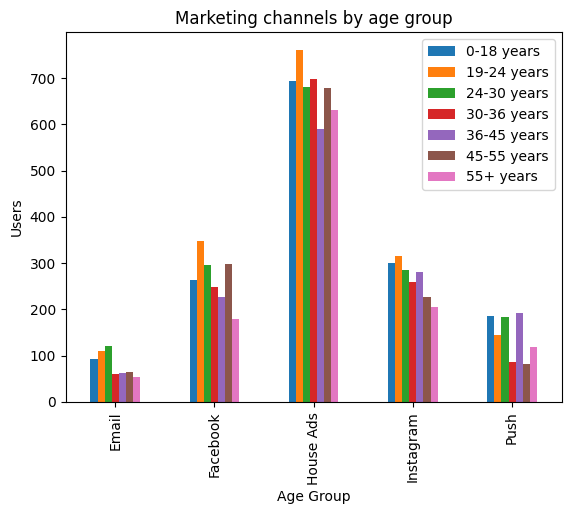

In [25]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

Email is not reaching older age groups, and Facebook is not reaching many people under 18

## Grouping and counting by multiple columns

In [26]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [27]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained']==True].groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


## Analyzing retention rates for the campaign


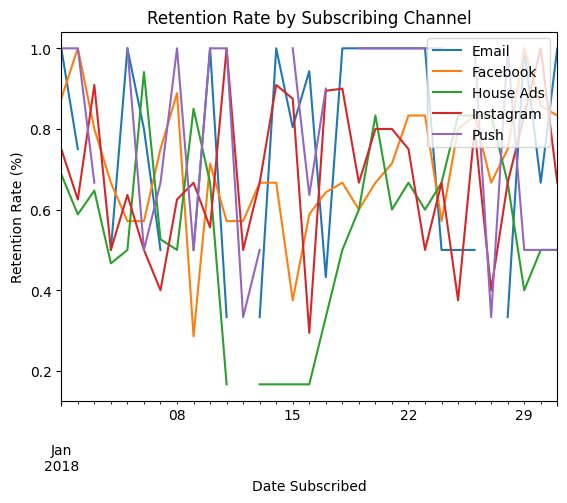

In [28]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right',
            labels = retention_rate_df.columns.values)
plt.show()

## Building a conversion function

In [29]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

## Test And Visualize Conversion Function

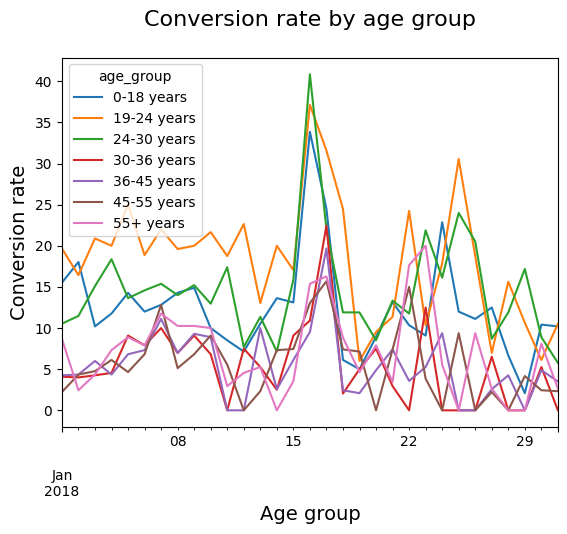

In [30]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))
age_group_df = age_group_df*100
# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

## Plotting Function

In [31]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation = 45)
        # Show plot
        plt.show()
        plt.clf()

## Putting it all together

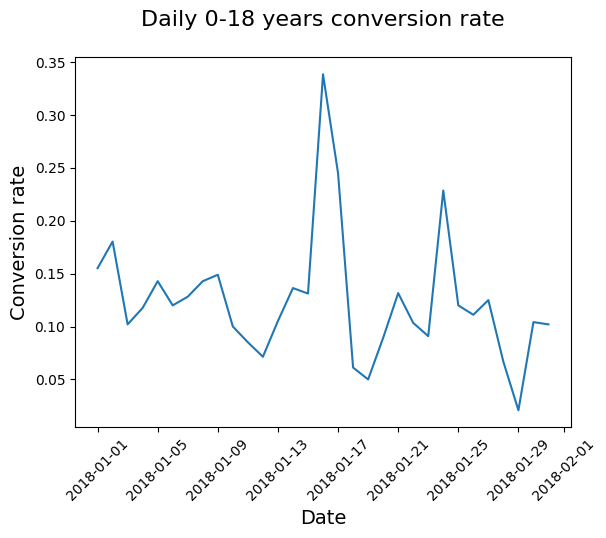

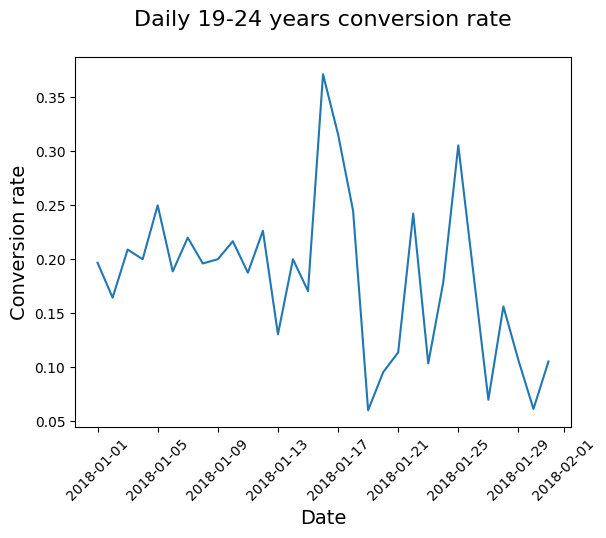

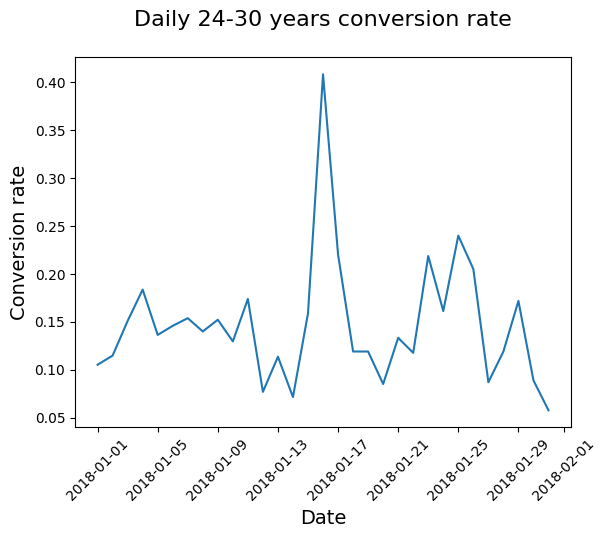

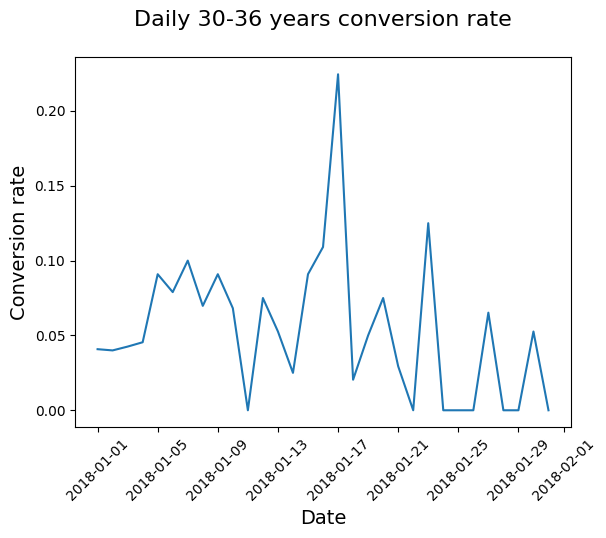

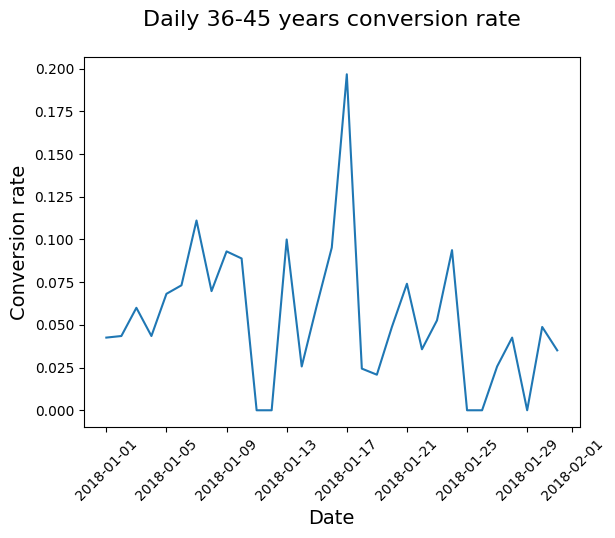

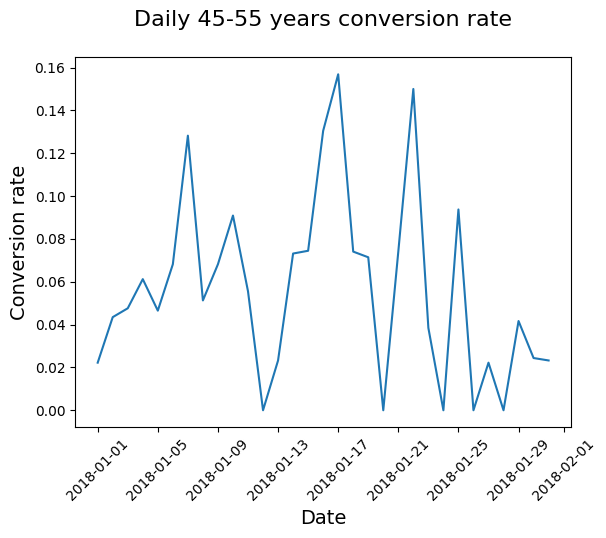

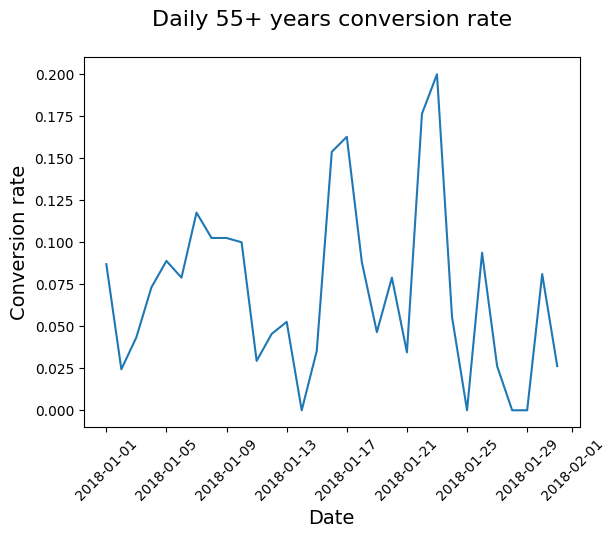

<Figure size 640x480 with 0 Axes>

In [32]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

## House ads conversion rate

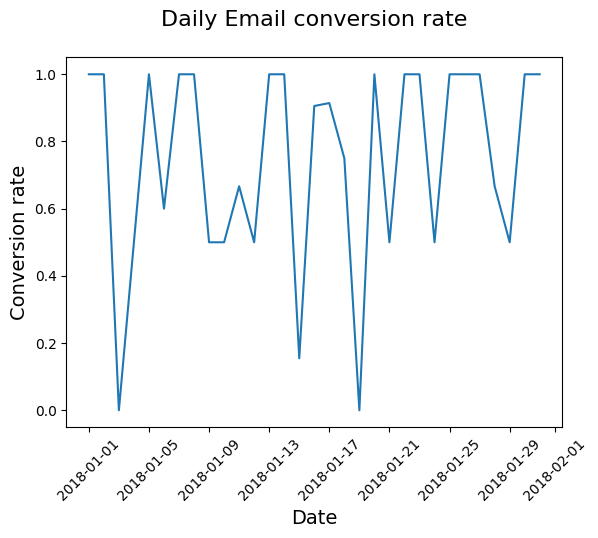

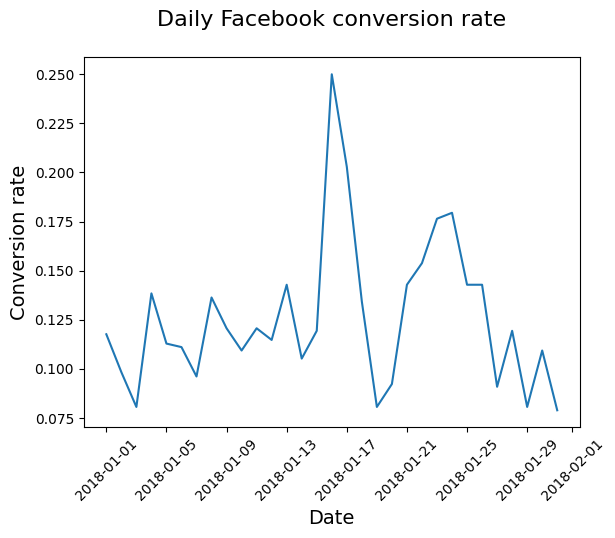

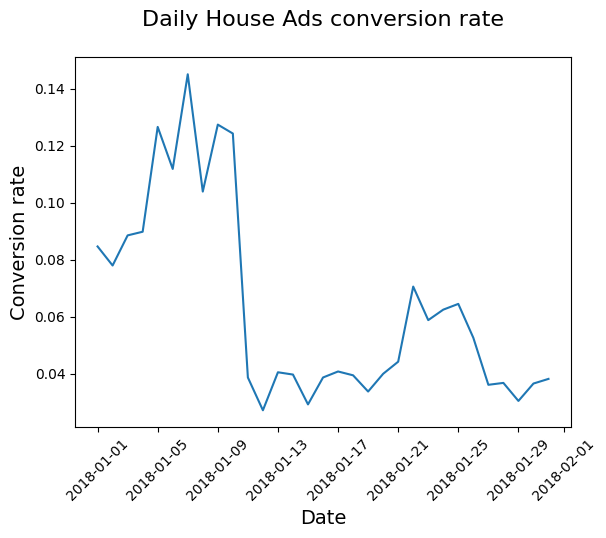

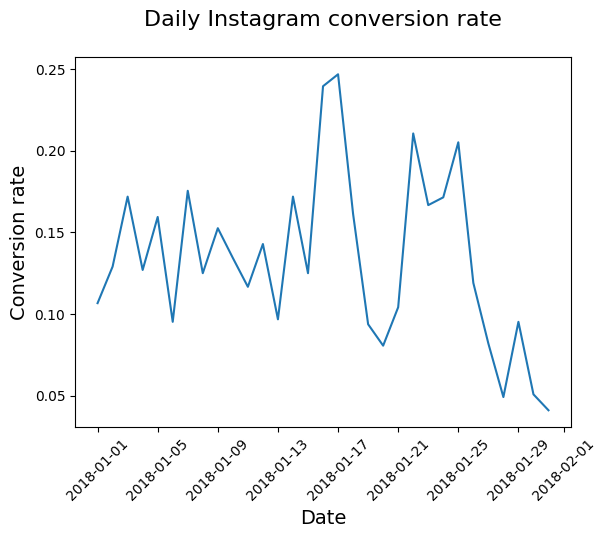

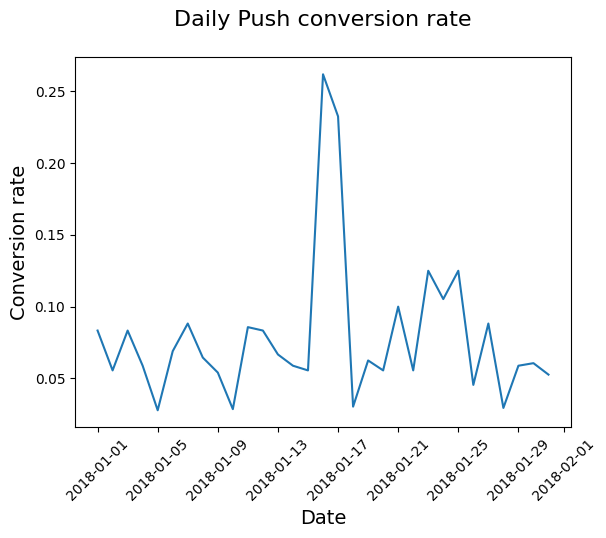

<Figure size 640x480 with 0 Axes>

In [33]:
# Calculate conversion rate by date_served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

# Unstack daily_conv_channel and create a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level=1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

## Analyzing House ads conversion rate

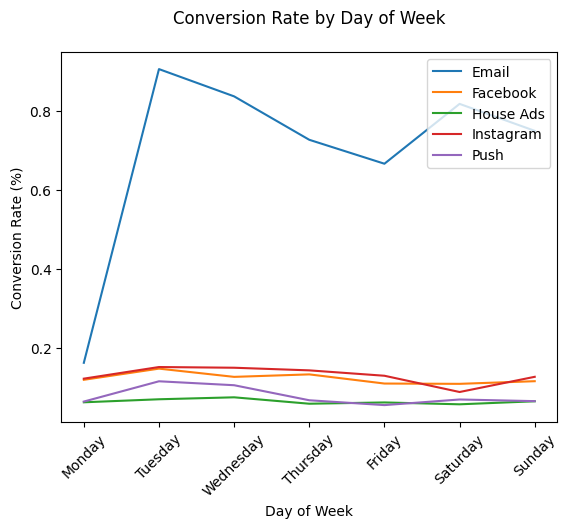

In [34]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])

# Unstack DoW_conversion and create a DataFrame
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion Rate by Day of Week\n')
plt.xlabel('Day of Week')
plt.ylabel('Conversion Rate (%)')
x_ticks = [0, 1, 2, 3, 4, 5, 6]
DoW_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(x_ticks, DoW_name, rotation = 45)
plt.legend(loc = 'upper right',
            labels = DoW_df.columns.values)
plt.show()

Email is particularly high and may be reflective of a tracking error, but house ads appear stable across the week with a slight peak on Tuesday. 

## House Ads Conversion By Language

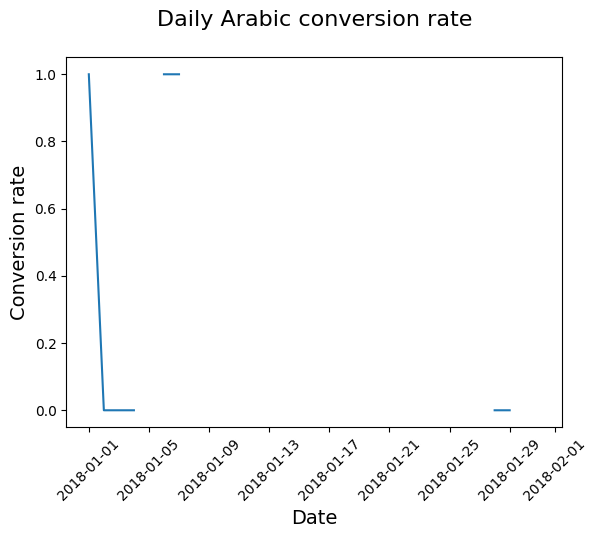

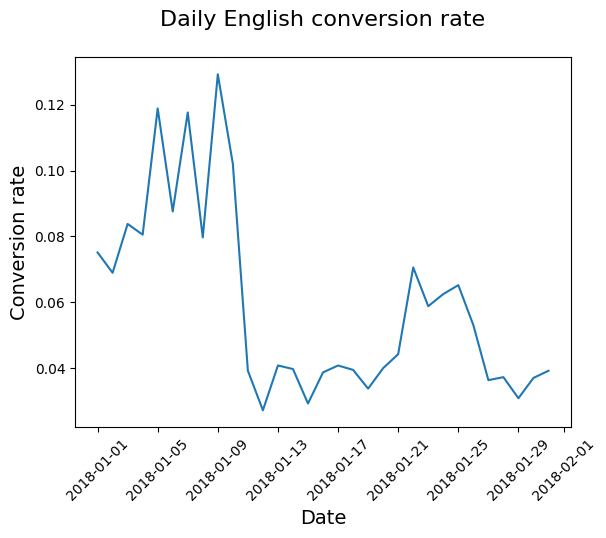

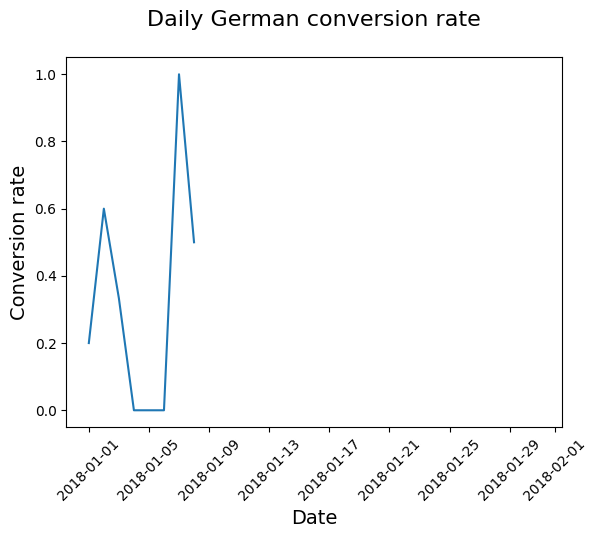

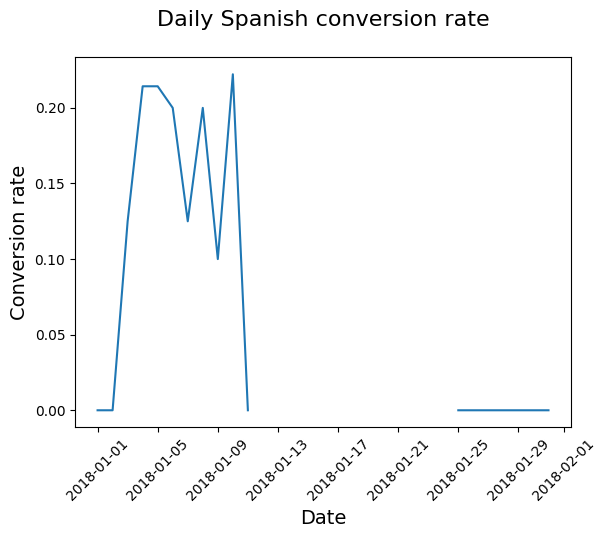

<Figure size 640x480 with 0 Axes>

In [35]:
# Isolate the rows where marketing channel is House Ads
house_ads = pd.DataFrame(marketing[marketing['marketing_channel']=='House Ads'])

# Calculate conversion rate by date served and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])

# Unstack conv_lang_channel and create a DataFrame
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Plot the results
plotting_conv(conv_lang_df)

### The English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period.

## Creating a DataFrame for house ads

In [36]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'], 
    'Yes', 
    'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served', 'is_correct_lang'])['date_served'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


## Confirming house ads error

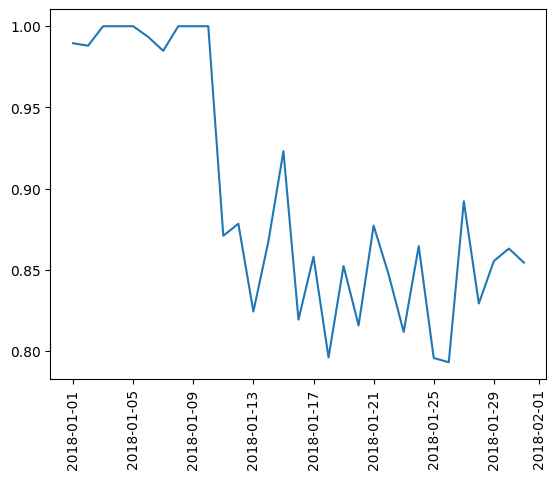

In [37]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation = 90)
plt.show()

House ads have been underperforming due to serving all ads in English rather than each user's preferred language

## Setting up conversion indexes

We see that language is the issue with House Ads conversion, we look further to check how many subscribers have been lost as a result of this bug.

In [38]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, 'language_displayed')

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print('Spanish index: ', spanish_index)
print('Arabic index: ', arabic_index)
print('German index: ', german_index)

Spanish index:  1.681924882629108
Arabic index:  5.045774647887324
German index:  4.485133020344287


## Analyzing user preferences

We determine the scale of the bug by checking the number of subscribers that woudld have been expected had there been no language error.

In [39]:
# Group house ads by data and language
converted = house_ads.groupby(['date_served', 'language_preferred']).agg({'user_id': 'nunique', 'converted': 'sum'})

# Unstack converted and create a DataFrame
converted_df = pd.DataFrame(converted.unstack(level=1))

## Creating a DataFrame based on indexes

Building a DataFrame to estimate what the daily conversion would have been if users were being served the correct language.

In [40]:
# Create English conversion rate column for affected period
converted_df['english_conv_rate'] = converted_df.loc["2018-01-11":"2018-01-31"][("converted"), ("English")]

# Create expected conversion rates for each language
converted_df['expected_spanish_rate'] = converted_df['english_conv_rate'] * spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate'] * arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate'] * german_index

# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate'] * converted_df[("user_id"), ("Spanish")] /100
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate'] *  converted_df[("user_id"), ("Arabic")] /100
converted_df['expected_german_conv'] = converted_df['expected_german_rate'] *  converted_df[("user_id"), ("German")] /100

In [41]:
display(converted_df)

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2   
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   
2018-01-21             1.0    99.0    4.0     9.0     False       5      0   
2018-01-22             2.0    72.0    3.0     8.0         1       4      1   
2018-01-23             3.0    69.0    4.0     9.0         0       5      0   
2018-01-24             2.0    83.0    3.0     8.0         0       6      0   
2018-01-25             3.0    75.0    4.0    11.0         0       4      2   
2018-01-26             6.0    89.0    3.0    16.0         0       4      0   
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-01               0               NaN                   NaN   
2018-01-02               0               NaN                   NaN   
2018-01-03               1               NaN                   NaN   
2018-01-04               3               NaN                   NaN   
2018-01-05               3               NaN                   NaN   
2018-01-06               2               NaN                   NaN   
2018-01-07               1               NaN                   NaN   
2018-01-08               2               NaN                   NaN   
2018-01-09               1               NaN                   NaN   
2018-01-10               4               NaN                   NaN   
2018-01-11               0                 6             10.091549   
2018-01-12               1                 3              5.045775   
2018-01-13               0                 5              8.409624   
2018-01-14               0                 6             10.091549   
2018-01-15               0                 6             10.091549   
2018-01-16               0                 6             10.091549   
2018-01-17               4          

## Assessing Bug Impact

In [42]:
# Use .loc to slice only the relevant dates
converted = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted[('converted','Spanish')].sum() + converted[('converted','Arabic')].sum() + converted[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265
